In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [17]:
train_dataset, validation_dataset, test_dataset = tfds.load(
    'mnist',
    split=["train[0%:80%]", "train[80%:100%]", "test"],
    shuffle_files=True,
    as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\senuruk\tensorflow_datasets\mnist\3.0.1.incompleteAIWA16\mnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\senuruk\tensorflow_datasets\mnist\3.0.1.incompleteAIWA16\mnist-test.tfrecord*...:   0%|    …

Dataset mnist downloaded and prepared to C:\Users\senuruk\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [18]:
print(f"Number of training samples: {train_dataset.cardinality()}")
print(f"Number of validation samples: {validation_dataset.cardinality()}")
print(f"Number of test samples: {test_dataset.cardinality()}")

Number of training samples: 48000
Number of validation samples: 12000
Number of test samples: 10000


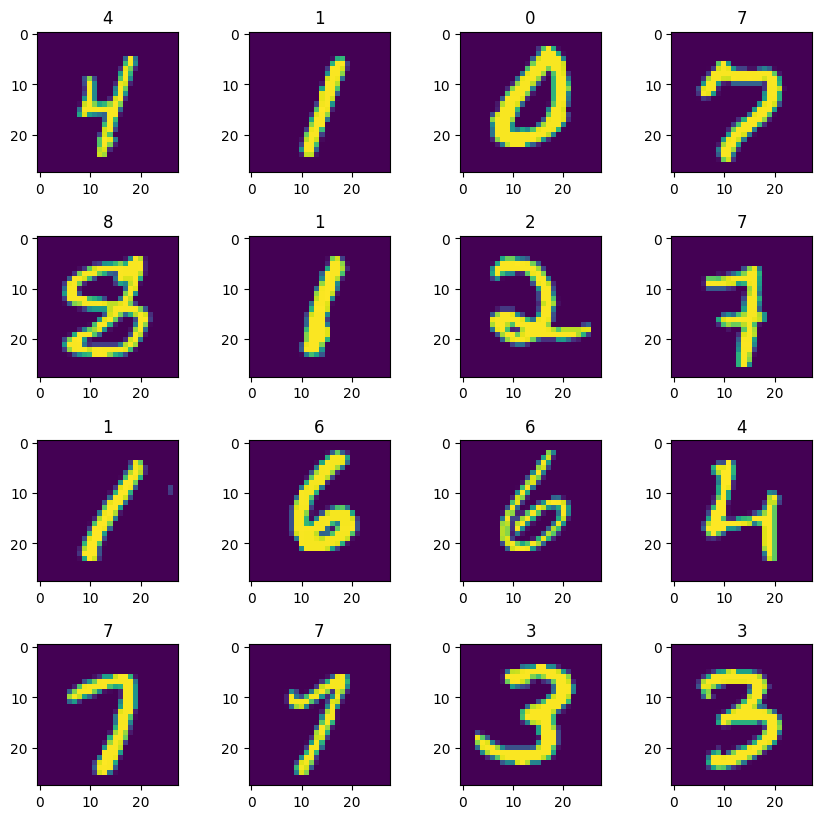

In [24]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_dataset.take(64)):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(int(label))
plt.subplots_adjust(wspace=0.5, hspace=0.3)